# I-94 Traffic

## Introduction
We will explore the traffic on westbound I-94 to investigate the causes of heavier and lighter traffice. We will use a dataset from the [UCI Machine Learning Repo](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)

## Goal
What are the indicators of heavy traffic on I-94?

## Data Dictionary

- ```holiday``` Categorical US National holidays plus regional holiday, Minnesota State Fair
- ```temp``` Numeric Average temp in kelvin
- ```rain_1h``` Numeric Amount in mm of rain that occurred in the hour
- ```snow_1h``` Numeric Amount in mm of snow that occurred in the hour
- ```clouds_all``` Numeric Percentage of cloud cover
- ```weather_main``` Categorical Short textual description of the current weather
- ```weather_description``` Categorical Longer textual description of the current weather
- ```date_time``` DateTime Hour of the data collected in local CST time
- ```traffic_volume``` Numeric Hourly I-94 ATR 301 reported westbound traffic volume

### Load libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-whitegrid')

%matplotlib inline


In [2]:
df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [3]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
df.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


### Analyzing Traffic Volume

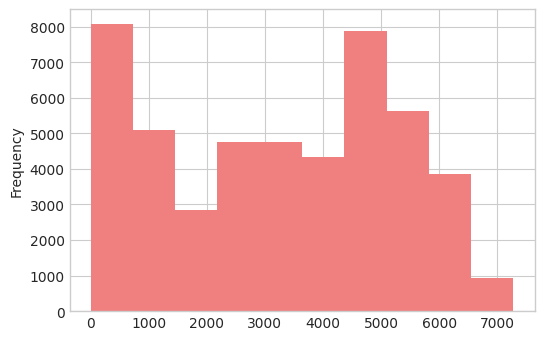

In [25]:
# plot a histogram of the distribution of traffic_volume

#df.plot.hist(df['traffic_volume'])
df['traffic_volume'].plot.hist(color='lightcoral')

Traffic volume represents the hourly number of westbound cars on I-94. There are two peaks with bin centers of about 300 and 4800. The lower bin is probably middle of the night numbers and the higher bin is probably peak commuting time. 

In [7]:
df['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

The above insight is confirmed when we use ```describe```, as we see that there is a fairly large standard deviation here. We will first start with exploring traffic volume by day and night.

### Day vs. Night

We will divide the dataset into two parts:

- Day hours: 7am to 7pm
- Night hours: 7pm to 7am

In [8]:
# transform the date_time column to a datetime object

df['date_time'] = pd.to_datetime(df['date_time'])

In [9]:
# time is kept in 24 hour time so we can use
# daytime = [8 - 19]
# nighttime = [20 - 7]

#print(df['date_time'].dt.hour)
# Use boolean logic to isolate day and night data

day = df[(df['date_time'].dt.hour >= 8) & 
        (df['date_time'].dt.hour <= 19)]

night = df[(df['date_time'].dt.hour >= 20) | 
          (df['date_time'].dt.hour < 7)]

In [10]:
#night.tail(10)

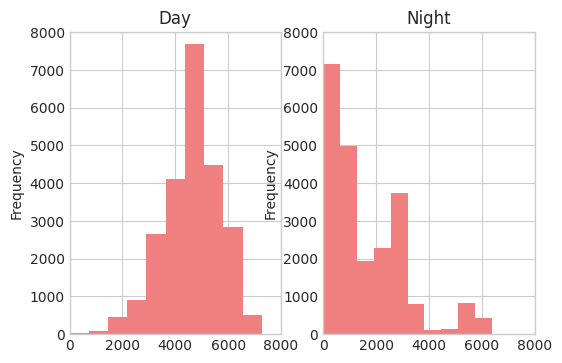

In [26]:
plt.figure()#figsize=(8,6))

plt.subplot(1,2,1)
day['traffic_volume'].plot.hist(color='lightcoral')
plt.title('Day')
plt.ylim(0,8000)
plt.xlim(0,8000)


plt.subplot(1,2,2)
night['traffic_volume'].plot.hist(color='lightcoral')
plt.title('Night')
plt.ylim(0,8000)
plt.xlim(0,8000)

plt.show()

In [12]:
day['traffic_volume'].describe()

count    23759.00000
mean      4641.33924
std       1068.65102
min          0.00000
25%       4049.00000
50%       4708.00000
75%       5337.00000
max       7280.00000
Name: traffic_volume, dtype: float64

In [13]:
night['traffic_volume'].describe()

count    22366.000000
mean      1654.648484
std       1425.175292
min          0.000000
25%        486.000000
50%       1056.500000
75%       2630.750000
max       6386.000000
Name: traffic_volume, dtype: float64

We see that the Day and Night distributions look very different. At night, more than 75% of the time the number of cars per hour is less than 3000. While during the day, it is rare to have fewer than 2000 cars per hour. The night data is almost bimodal, which also might be because of our choices of day and night switching. 

In general, since we are looking for indicators of heavy traffic, for now, we will focus only on the day data.

### Time Indicators

Another possible indicator of heavy traffic is time. We are going to look at how traffic volume varies by month, day of the week, and time of day. We will use ```df.groupby()``` to accomplish this quickly.

<ipython-input-30-11d8ac192e40>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



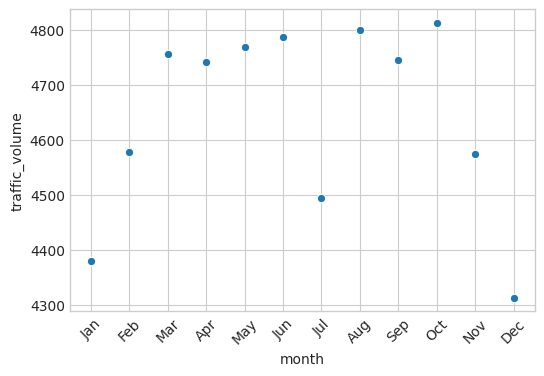

In [30]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()


sns.scatterplot(x=by_month.index, y='traffic_volume',data=by_month)
plt.xticks(ticks, labels, rotation=45)

plt.show()

Overall, winter months had the lowest traffic volumes. July is an exception. 

<ipython-input-15-a85c372cf3d8>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



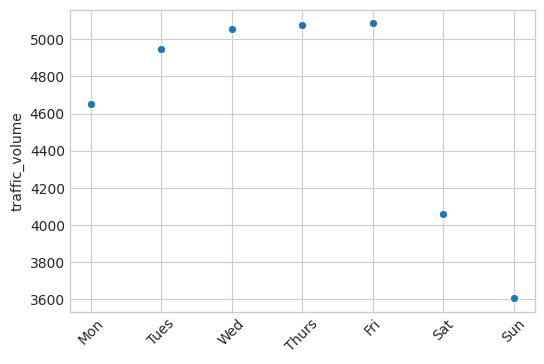

In [15]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()

labels = ('Mon','Tues','Wed','Thurs','Fri','Sat','Sun')
ticks = np.arange(7) + 1


sns.scatterplot(x=ticks, y='traffic_volume',data=by_dayofweek)
plt.xticks(ticks, labels, rotation=45)
#color='orange', fontweight='bold', fontsize='17', horizontalalignment='right')

plt.show()

Saturday and Sunday are the lowest average traffic volumes. This is not surprising and confirms that most traffic is related to work commuting.

Finally, we will look at the time of day. Based on above, we will split the business days and weekends for our analysis.

In [16]:
day['hour'] = day['date_time'].dt.hour
business_days = day.copy()[day['dayofweek'] <= 4]
weekend = day.copy()[day['dayofweek'] >= 5]

by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

#print(by_hour_business)

<ipython-input-16-e45702392d96>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



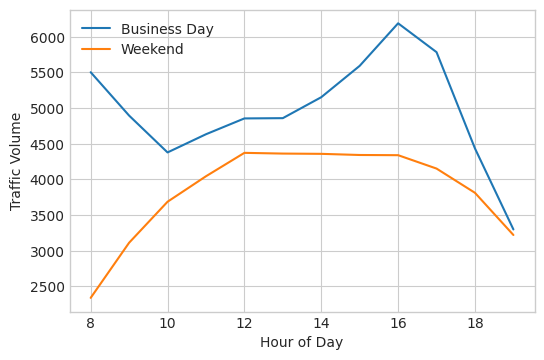

In [17]:


sns.lineplot(x=by_hour_business.index,y='traffic_volume',data=by_hour_business,
            label='Business Day')

sns.lineplot(x=by_hour_weekend.index,y='traffic_volume',data=by_hour_weekend,
            label='Weekend')
#plt.legend()
plt.xlabel('Hour of Day')
plt.ylabel('Traffic Volume')
plt.show()


On business days, we see that most traffic occurs between 3 and 5 pm. There appears to be a peak around 8am we could also expand our focus on. On weekends, there is a wider range of peak values corresponding to 12 pm to 4 pm. The weekend values (as we noted earlier) are much smaller than business day values. 

### Weather Indicators

We will now look at weather indicators for heavy traffic. The dataset provides quite a few useful columns related to weather, so we will start by looking at their correlation values with ```traffic_volume```.

In [18]:
weather_cols = ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 
                'weather_main', 'weather_description']

#for x in weather_cols:
#    print(x,' correlation:')
#    print(day.corr()['traffic_volume'])

#day.columns
print(day.corr()['traffic_volume'])

temp              0.133283
rain_1h           0.005001
snow_1h           0.005186
clouds_all       -0.037828
traffic_volume    1.000000
month            -0.012350
dayofweek        -0.324395
hour              0.004045
Name: traffic_volume, dtype: float64


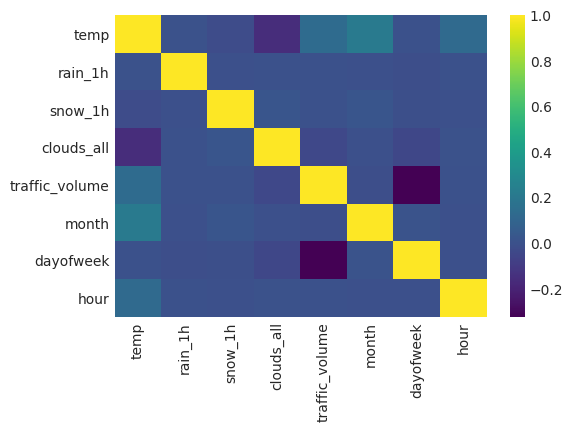

In [19]:
sns.heatmap(day.corr(),cmap='viridis')

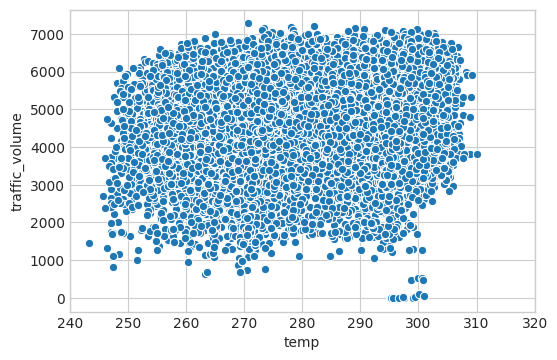

In [20]:
sns.scatterplot(x='temp',y='traffic_volume',data=day)
plt.xlim(240,320)
plt.show()

None of the numerical weather indicators are strong correlations with the traffic volume. We show the relatioship between temperature and traffic volume in the above graph, which has the strongest correlation, but there is not a relationship there.

### Weather Types

We will now look at the categorical weather-related columns: ```weather_main``` and ```weather_description```.

In [21]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

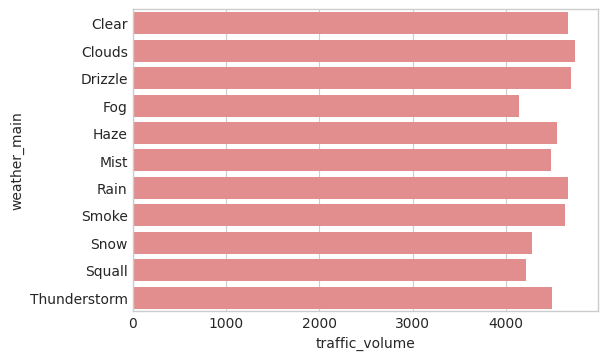

In [22]:
sns.barplot(x='traffic_volume',y=by_weather_main.index,
           data=by_weather_main,color='lightcoral')

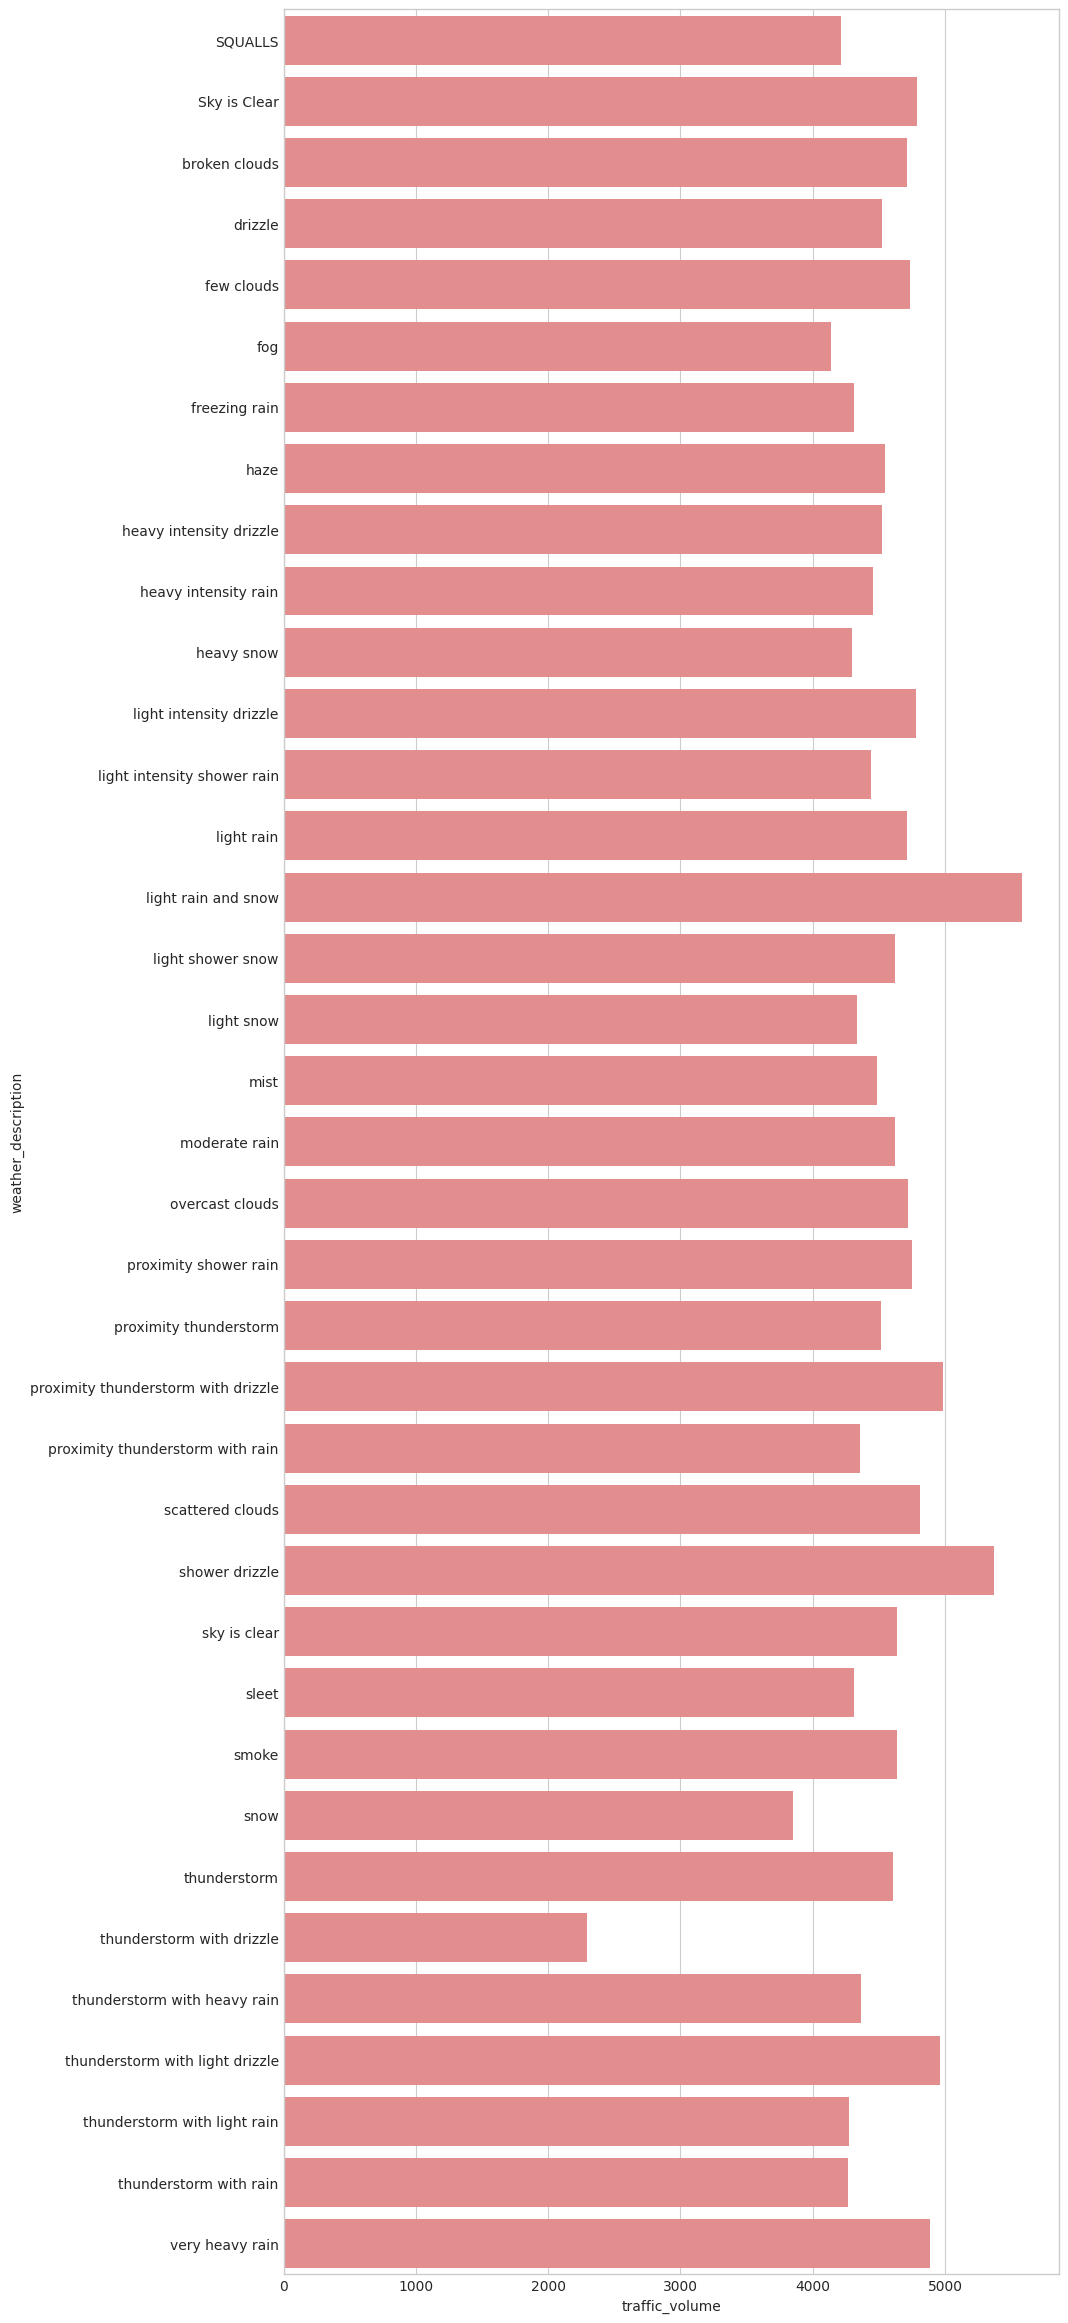

In [23]:
plt.figure(figsize=(10,30))
sns.barplot(x='traffic_volume',y=by_weather_description.index,
           data=by_weather_description,color='lightcoral')

Light rain and snow, along with shower drizzle are the highest traffic volumes. The coarser weather grouping above does not clearly show a reliable indicator for traffic volume.